In [ ]:
# Step 1: Import required libraries
# files: to upload files in Google Colab
# zipfile: to extract ZIP archives
# pandas: to work with data
# os: to interact with the file system
from google.colab import files
import zipfile
import pandas as pd
import os

# Step 2: Upload the ZIP file from your local machine
print("Please upload the file: bank-additional.zip")
uploaded = files.upload()

# Step 3: Extract files from the uploaded ZIP archive
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

    # Extract all files inside the ZIP into the folder 'bank_data'
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('bank_data')
        print("Files extracted successfully!")

    # Step 4: List all extracted files
    print("Extracted files:")
    for file in os.listdir('bank_data'):
        print(f"  - {file}")



Please upload the file: bank-additional.zip


Saving bank+marketing.zip to bank+marketing (6).zip
Uploaded file: bank+marketing (6).zip
Files extracted successfully!
Extracted files:
  - bank.zip
  - bank-additional.zip


In [ ]:
import zipfile
import os
import pandas as pd

# ----------------------------------------------------
# Step 1: Extract all ZIP files recursively
# ----------------------------------------------------
def extract_all_zips(base_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.zip'):
                zip_path = os.path.join(root, file)
                extract_path = zip_path.replace('.zip', '')
                if not os.path.exists(extract_path):
                    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                        zip_ref.extractall(extract_path)
                        print(f"Extracted: {zip_path}")

# Run extraction starting from bank_data
extract_all_zips('bank_data')

# ----------------------------------------------------
# Step 2: List all files after extraction
# ----------------------------------------------------
print("\nFinal file structure:")
for root, dirs, files in os.walk('bank_data'):
    for file in files:
        print(os.path.join(root, file))

# ----------------------------------------------------
# Step 3: Find Bank Marketing CSV file
# ----------------------------------------------------
csv_path = None
for root, dirs, files in os.walk('bank_data'):
    for file in files:
        if file.endswith('.csv') and 'bank' in file.lower():
            csv_path = os.path.join(root, file)
            break
    if csv_path:
        break

# ----------------------------------------------------
# Step 4: Validate and load the dataset
# ----------------------------------------------------
if csv_path is None:
    raise FileNotFoundError("❌ Bank Marketing CSV file not found.")
else:
    print("\n✅ Using CSV file:", csv_path)

df = pd.read_csv(csv_path, sep=';')

# Display first rows to confirm
df.head()


Extracted: bank_data/bank.zip
Extracted: bank_data/bank-additional.zip

Final file structure:
bank_data/bank.zip
bank_data/bank-additional.zip
bank_data/bank/bank.csv
bank_data/bank/bank-names.txt
bank_data/bank/bank-full.csv
bank_data/bank-additional/bank-additional/bank-additional-names.txt
bank_data/bank-additional/bank-additional/bank-additional.csv
bank_data/bank-additional/bank-additional/bank-additional-full.csv
bank_data/bank-additional/bank-additional/.Rhistory
bank_data/bank-additional/bank-additional/.DS_Store
bank_data/bank-additional/__MACOSX/._bank-additional
bank_data/bank-additional/__MACOSX/bank-additional/._.DS_Store

✅ Using CSV file: bank_data/bank/bank.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.info()
df.describe()
df.isnull().sum()

pd.DataFrame({
    'column': df.columns,
    'type': df.dtypes,
    'unique_values': [df[col].nunique() for col in df.columns]
})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,column,type,unique_values
age,age,int64,67
job,job,object,12
marital,marital,object,3
education,education,object,4
default,default,object,2
balance,balance,int64,2353
housing,housing,object,2
loan,loan,object,2
contact,contact,object,3
day,day,int64,31


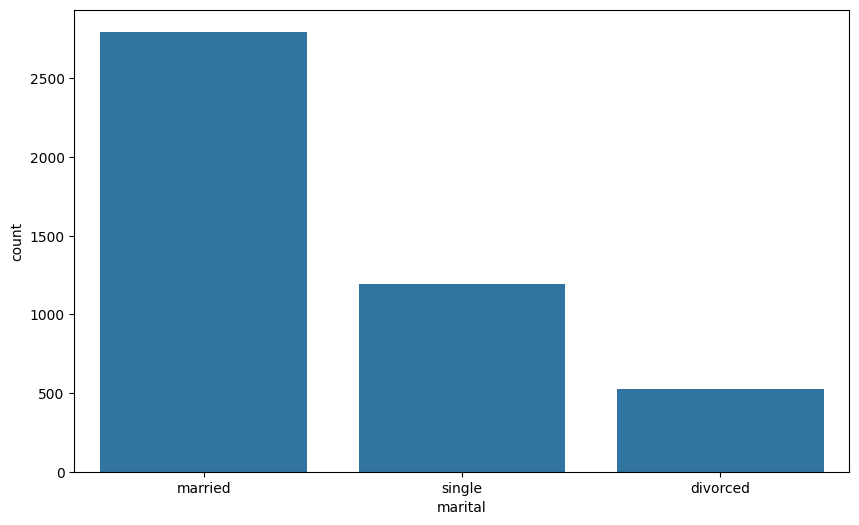

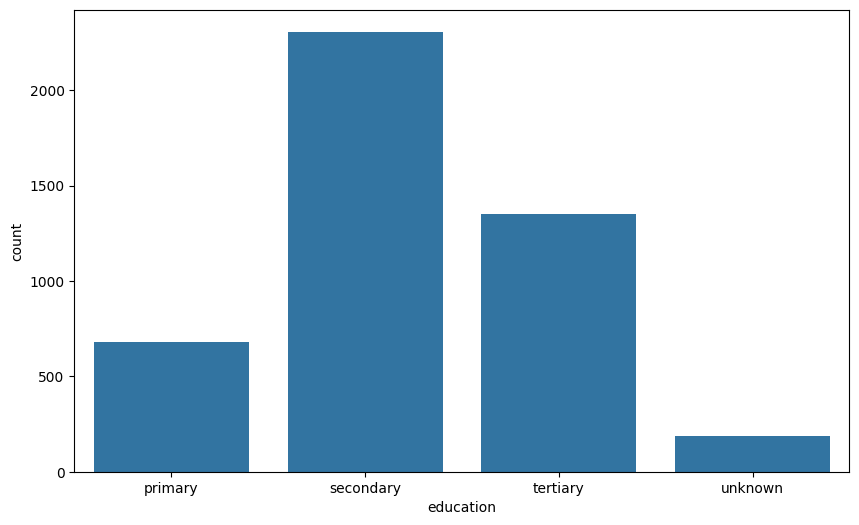

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital', data=df)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='education', data=df)
plt.show()


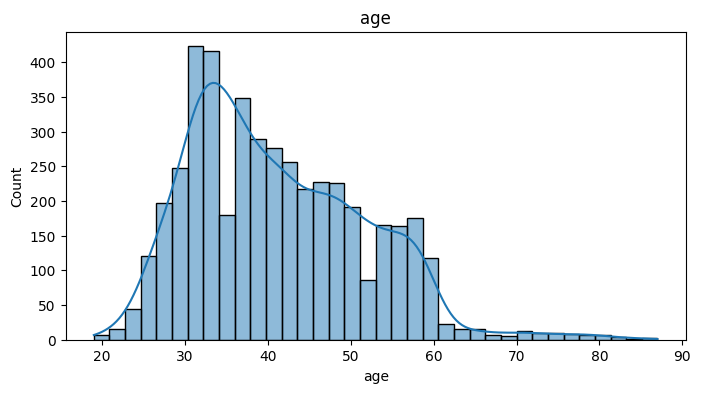

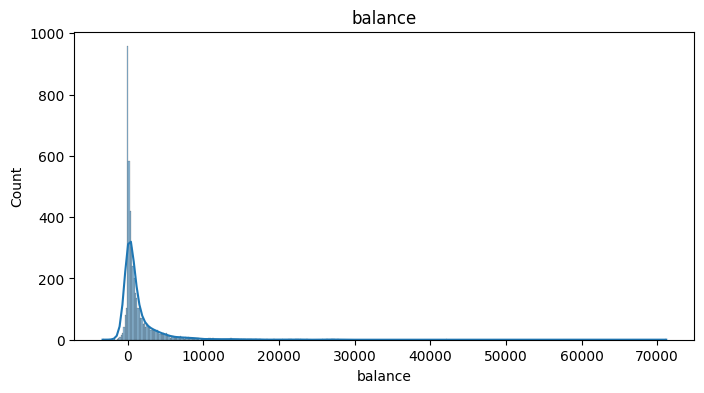

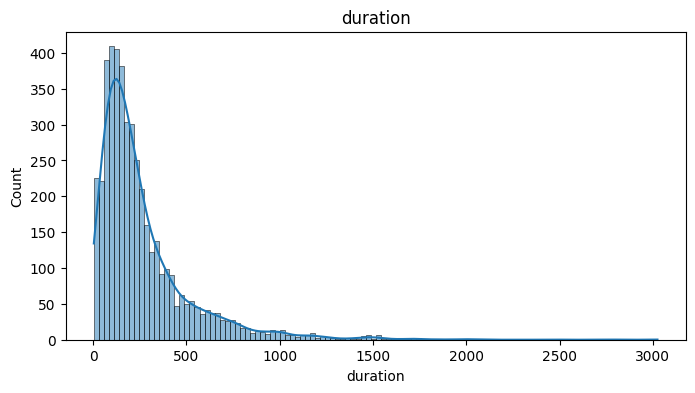

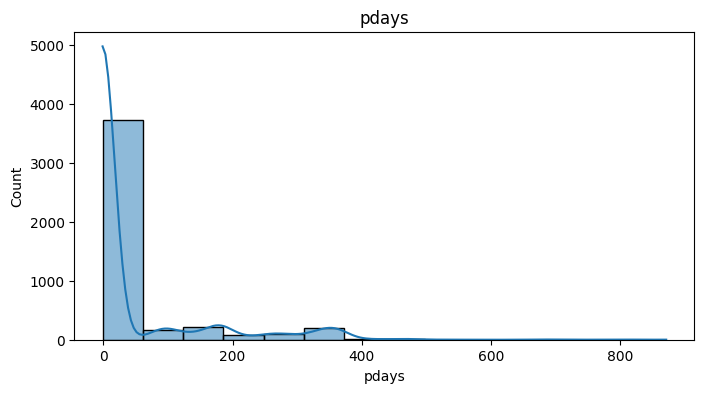

In [ ]:
numerical = ['age', 'balance', 'duration', 'pdays']

for col in numerical:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


In [ ]:
binary_map = {'yes':1, 'no':0}

for col in ['default','housing','loan','y']:
    df[col] = df[col].map(binary_map)

df['education'] = df['education'].str.lower()



In [ ]:
df.replace({
    'job': {
        'admin.':1,'blue-collar':2,'entrepreneur':3,'housemaid':4,
        'management':5,'retired':6,'self-employed':7,'services':8,
        'student':9,'technician':10,'unemployed':11
    },
    'marital': {'married':1,'single':2,'divorced':3},
    'education': {'primary':1,'secondary':2,'tertiary':3},
    'contact': {'cellular':1,'telephone':2},
    'month': {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
              'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},
    'poutcome': {'failure':1,'other':2,'success':3}
}, inplace=True)


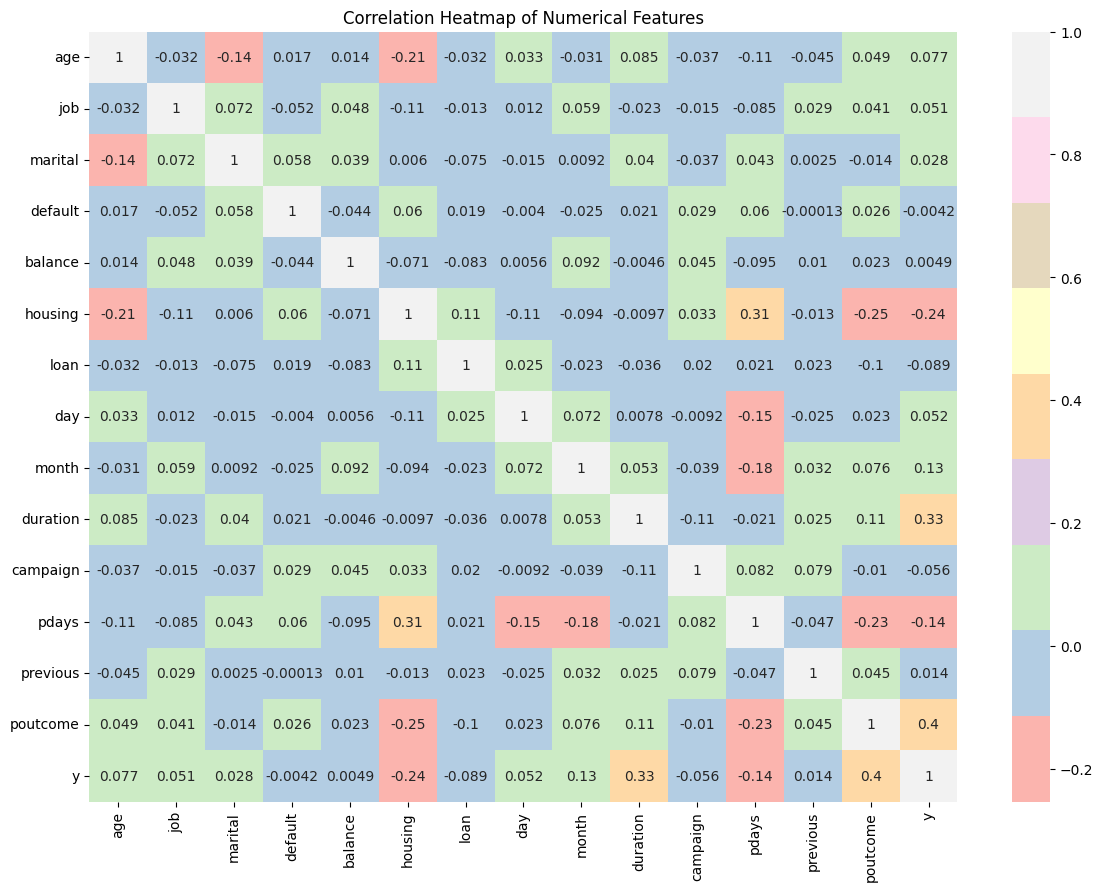

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,10))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='Pastel1')

plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:
X = df.drop('y', axis=1)
y = df['y']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)  # yes=1 , no=0


In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Encode target variable (yes/no)
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Double check: all features must be numeric
print(X_train.dtypes.unique())  # should show only numeric types

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


[dtype('int64') dtype('bool')]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.7839506172839507

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
accuracy_score(y_test, y_pred_tree)


0.8148148148148148

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy_score(y_test, y_pred_knn)


0.7901234567901234

In [ ]:
results = pd.DataFrame({
    'Logistic': [accuracy_score(y_test, y_pred)],
    'Decision Tree': [accuracy_score(y_test, y_pred_tree)],
    'KNN': [accuracy_score(y_test, y_pred_knn)]
})

results


,Logistic,Decision Tree,KNN
0,0.783951,0.814815,0.790123
